In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('customer_acquisition_data.csv')

In [3]:
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [4]:
df['channel'].unique()

array(['referral', 'paid advertising', 'email marketing', 'social media'],
      dtype=object)

In [7]:
df.isnull().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [8]:
df.groupby('channel').agg(average_conversion_rate=('conversion_rate',lambda x :x.mean())).reset_index()

,channel,average_conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


In [11]:
df['expected_revenue_per_customer']=round(df['conversion_rate']*df['revenue'],2)

In [13]:
df['Profit/Loss']=df['expected_revenue_per_customer']-df['cost']

In [14]:
df['ROI']=round(df['Profit/Loss']/df['cost'],2)*100

In [25]:
df1=df.groupby('channel').agg(cost=('cost',lambda x : x.sum()),avg_cost=('cost','mean'),exp_rev=('expected_revenue_per_customer','sum'),exp_rev_mean=('expected_revenue_per_customer','mean'),returns=('Profit/Loss','sum'),ROI=('ROI','mean')).reset_index()
df1

,channel,cost,avg_cost,exp_rev,exp_rev_mean,returns,ROI
0,email marketing,1122.700340,5.246263,26499.57,123.829766,25376.869660,2260.327103
1,paid advertising,5907.363479,30.450327,8961.59,46.193763,3054.226521,51.654639
2,referral,1722.307634,8.320327,70137.45,338.828261,68415.142366,3972.328502
3,social media,1766.070249,9.546326,82567.14,446.308865,80801.069751,4575.210811


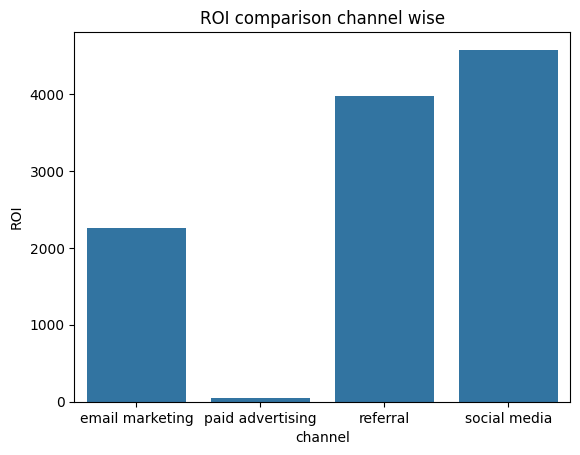

<Figure size 500x500 with 0 Axes>

In [23]:
sns.barplot(df1,x='channel',y='ROI')
plt.title('ROI comparison channel wise')
plt.figure (figsize=(5,5))
plt.show()